# 线性二次型最优控制问题

> 线性二次型最优控制理论是最优控制理论中发展最为成熟，最具有系统性，应用最广泛的分支

线性时变系统的状态方程和输出方程：$$\begin{cases} \dot X(t)=A(t)X(t)+B(t)U(t) & ,X(t_0)=X_0\\ Y(t)=C(t)X(t)\end{cases}$$
设定预期输出为$z(t)$，误差向量为：$e(t)=z(t)-y(t)$  
引入二次型性能指标函数：$J=\frac{1}{2}e^T(t_f)Fe(t_f)+\frac{1}{2}\int_{t_0}^{t_f}[X^T(t)Q(t)X(t)+U^T(t)R(t)U(t)]dt$  
目标：寻找一个最优控制输入$U^*(t)$，使得指标函数最小。  
因此，有：
- 若$C(t)=I,z(t)=0$，则$Y(t)=X(t)=-e(t)$，有：$$J=\frac{1}{2}X^T(t_f)FX(t_f)+\frac{1}{2}\int_{t_0}^{t_f}[X^T(t)Q(t)X(t)+U^T(t)R(t)U(t)]dt$$
这被称为**状态调节问题**
- 若$z(t)=0$，则$Y(t)=-e(t)$，有$$J=\frac{1}{2}Y^T(t_f)FY(t_f)+\frac{1}{2}\int_{t_0}^{t_f}[Y^T(t)Q(t)Y(t)+U^T(t)R(t)U(t)]dt$$
这被称为**输出调节问题**
- 若$z(t)\neq 0$，则$e(t)=z(t)-Y(t)$，有$$J=\frac{1}{2}e^T(t_f)Fe(t_f)+\frac{1}{2}\int_{t_0}^{t_f}[X^T(t)Q(t)X(t)+U^T(t)R(t)U(t)]dt$$ 这被称为**输出跟踪问题**

## - 有限时间线性二次型状态调节器问题

线性时不变系统状态方程：$\dot X(t)=A(t)X(t)+B(t)U(t)$，初始条件：$X(t_0)=X_0,t\in[t_0,t_f]$  
二次型性能指标函数：$$J=\frac{1}{2}X^T(t_f)FX(t_f)+\frac{1}{2}\int_{t_0}^{t_f}[X^T(t)Q(t)X(t)+U^T(t)R(t)U(t)]dt$$
存在最优控制输入$U^*(t)$的充要条件：$$U^*(t)=-R^{-1}(t)B^T(t)P(t)X^*(t)=-K(t)X^*(t)$$
最优轨迹为：$$\dot X^*(t)=A(t)X^*(t)+B(t)U^*(t)=[A(t)-B(t)K(t)]X^*(t)$$
状态转移方程为：$$X^*(t)=X_0e^{\int_0^t(A(x)+B(x)K(x))dx}$$
最有性能函数为：$$J^*=\frac{1}{2}X_0^TP(t_0)X_0$$
其中，P(t)满足：$$\begin{cases}-\dot P(t)+P(t)A(t)+A^T(t)P(t)-P(t)B(t)K(t)=-Q(t)\\ P(t_f)=F\end{cases}$$

## - 无限时间线性二次型状态调节器问题

线性定常系统状态方程：$\dot X(t)=AX(t)+BU(t)$，初始条件：$X(t_0)=X_0,t\in[t_0,\inf]$  
二次型性能指标函数：$$J=\frac{1}{2}\int_{t_0}^{\inf}[X^T(t)Q(t)X(t)+U^T(t)R(t)U(t)]dt$$
存在最优控制输入$U^*(t)$的充要条件：$$U^*(t)=-R^{-1}B^TPX^*(t)=-KX^*(t)$$
最优轨迹为：$$\dot X^*(t)=AX^*(t)+BU^*(t)=[A-BK]X^*(t)$$
状态转移方程为：$$X^*(t)=X_0e^{(A+BK)t}$$
最有性能函数为：$$J^*=\frac{1}{2}X_0^TPX_0$$
其中，P(t)满足：$$PA+A^TP-PBK=-Q$$

**Matlab code**  
- continious-time algebraic Riccati equations:
    ``` matlab
    [P,L,K]=care(A,B,Q,R);
    ```
    R(defaut I);K=$R^{-1}B^TP$;L(pole points)

- linear-quadratic regulator
``` matlab
[K,P,L]=lqr(A,B,Q,R)
```


EigenValue =

     1
     1


EigenValueMod =

   -3.1421
   -1.4584




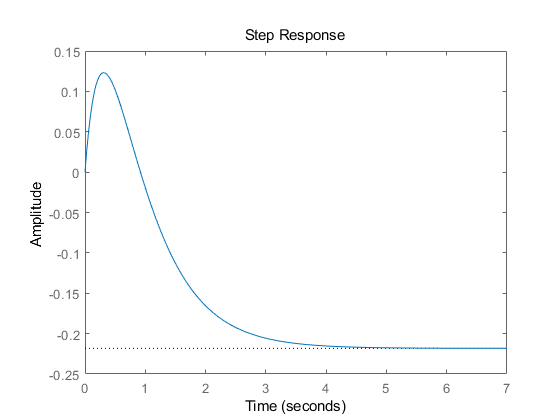

In [11]:
A=[1 0;1 1];B=[1;0];
EigenValue=eig(A)
Q=[10 0;0 10];
K=lqr(A,B,Q,1);
sys=ss(A-B*K,B,[1 0],[]);
EigenValueMod=eig(sys.a)
step(sys)

## - 最优跟踪问题

- 线性定常系统状态空间模型：$\begin{cases}\dot X(t)=AX(t)+BU(t)&,X(t_0)=X_0,t\geq t_0\\Y=CX\end{cases}$  
被跟踪参考量$\widetilde{y}$满足线性时不变系统：$\begin{cases} \dot Z=FZ & ,Z(t_0)=Z_0\\ \widetilde{y}=HZ\end{cases}$  
满足条件：$\sum(A,B)$完全可控，$\sum(A,C)$完全可观，$\sum(F,H)$完全可观。  
有二次型性能指标函数：$J(u)=\int_0^{\inf} [(Y-\widetilde{y})^TQ(Y-\widetilde y)+U^TRU]dt$  

- 这个组合系统可等价为：$$\begin{cases}\dot{\bar{X}}(t)=\bar{A} \bar{X}(t)+\bar{B}\bar{U}(t)& \bar{X}(t_0)=\bar{X_0},t\geq t_0 \\ J(u)=\int_0^{\inf}(\bar{X}^T\bar{Q}\bar{X}+U^T\bar{R}U)dt\end{cases}$$
其中，$\bar{X}=\begin{bmatrix}X\\Z\end{bmatrix},\bar{A}=\begin{bmatrix}A&O\\O&F\end{bmatrix},\bar{B}=\begin{bmatrix}B\\O\end{bmatrix},\bar{Q}=\begin{bmatrix}C^TQC&-C^TQH\\-H^TQC&H^TQH\end{bmatrix},\bar{R}=R$  

- 有Riccati代数方程的唯一正定解$\bar{P}=\begin{bmatrix}P_{11}&P_{12}\\P^T_{12}&P_{22}\end{bmatrix}$满足：$\bar{P}\bar{A}+\bar{A}^T\bar{P}+\bar{Q}-\bar{P}\bar{B}\bar{R}^{-1}\bar{B}^T\bar{P}=0$  
于是，有最优跟踪控制系统输入$U^*$为：$$U^*(t)=-K^*_1X-K^*_2Z$$ 其中，$\begin{cases}K^*_1=R^{-1}B^TP\\K^*_2=R^{-1}B^TP_{12}\end{cases}$

## - 最优调节系统的鲁棒性
> 衡量一个系统的鲁棒性指标有：**相角裕度**，**增益裕度**，**非线性反馈的容限**  

！待续